### AIT 526 - Natural Language Processing
### Lab 1: Text Preprocessing & Word Clouds
#### Group 9:
#### Yasser Parambathkandy
#### Indranil Pal
#### 5/24/2023


##### Installation
Install below packages before running notebook

pip install nltk

pip install wordcloud

pip install matplotlib


##### Task 1 : Text Preprocessing and Basic Analysis with NLTK </b>

1.1 Load one text file

In [101]:
with open('Harry Potter Book1.txt', 'r') as file:
    text = file.read()

1.2 Tokenize sentences and words. Print lens of sentences and tokens and only print the first 20 words.

In [93]:
import nltk
nltk.download("punkt")
# tokenize and print number of sentences
sentences = nltk.sent_tokenize(text)
num_sentences = len(sentences)
print("# of sentences:", num_sentences)

# tokenize words and print length
words = nltk.word_tokenize(text)
num_words = len(words)
print("# of tokens:", num_words)

# print the first 20 words
print("First 20 words:")
print(words[:20])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# of sentences: 6394
# of tokens: 98782
First 20 words:
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


1.3 Remove punctuations. Only print the first 20 words.

In [94]:
import string

words_without_punct = []
for token in words:
    # Remove punctuation characters from the start and end of the token
    token = token.strip(string.punctuation)
    # Add the modified token to the list if it's not empty
    if token and token != "n't":
        words_without_punct.append(token.lower())

# Print the tokens without punctuation
print('# of words after punctuation removal', len(words_without_punct))
print("First 20 words after removing punctuation:")
print(words_without_punct[:20])

# of words after punctuation removal 79490
First 20 words after removing punctuation:
['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


1.4 Remove stop words and count the distinct cleaned words.

In [95]:
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('stopwords')

sw = stopwords.words('english')
words_without_stopwords = [w for w in words_without_punct if w.lower() not in sw]
print("# of tokens without stopwords:", len(words_without_stopwords))
print(words_without_stopwords[:20])

freq_dist = FreqDist(words_without_stopwords)
print('count of distinct words', freq_dist)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# of tokens without stopwords: 40854
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']
count of distinct words <FreqDist with 5768 samples and 40854 outcomes>


1.5 Lemmatize the cleaned words and count the distinct lemmatized words.

In [96]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in words_without_stopwords]

freq_dist = FreqDist(lemmatized_words)
print("distinct words", freq_dist)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


distinct words <FreqDist with 5254 samples and 40854 outcomes>


 What’s different from 1.4? Please clearly  explain.

The number of distinct samples have reduced to 5254 from 5768. The lemmatization step has transformed the words to their canonical form. For example, "running" gets transformed to "run". By reducing the words to their root, the number of distinct words has decreased because inflected forms or variations of the same word are now unified.

1.6 Calculate the word distribution and plot and list only top 15 words.

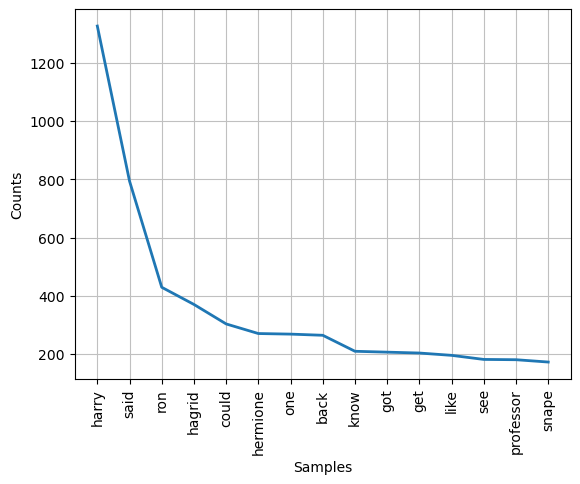

harry - 1327
said - 794
ron - 429
hagrid - 370
could - 303
hermione - 270
one - 268
back - 264
know - 209
got - 206
get - 203
like - 195
see - 181
professor - 180
snape - 172


In [97]:
freq_dist.plot(15, cumulative=False)

top_words = freq_dist.most_common(15)
for word, frequency in top_words:
    print(word, "-", frequency)

##### Task 2 : Word Clouds

2.1 Follow the wordcloud simple example to generate the word cloud without stopwords directly from the original text and show it. Note that you must remove the
stopwords

(-0.5, 399.5, 199.5, -0.5)

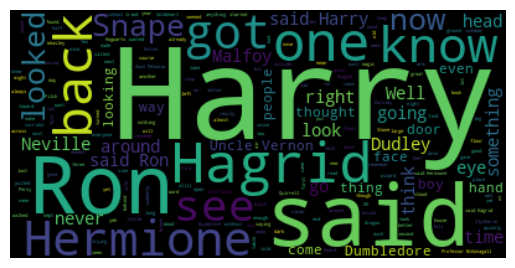

In [98]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

2.2 Generate the word cloud for the processed data in Task 1 and show the image.

(-0.5, 399.5, 199.5, -0.5)

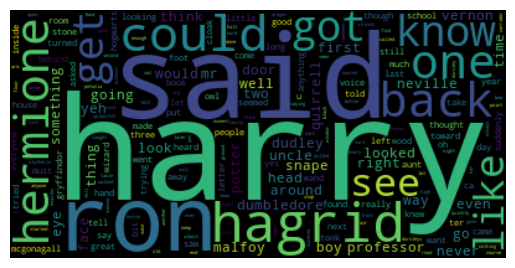

In [99]:
wordcloud_from_task1 = WordCloud().generate_from_frequencies(freq_dist)

plt.imshow(wordcloud_from_task1, interpolation='bilinear')
plt.axis("off")

2.3 Compare the above two word clouds and what difference do you find? Please clearly explain why

The primary differences in the two wordcloud images are:
1. The first wordcloud which is based on unprocessed text has duplicate entries like "Harry" and "Said" due to case difference. The second wordcloud which is based on cleaned text has the case unified, and so they appear only once
2. The word "could" appears in the second wordcloud prominently because it is stripped from its contractions like couldn't and unified with "could" occurrences.
3. The word "like" appears in the second wordcloud prominently because the lemmatization step has unified "liked" and "like" increasing the number of occurrences.

##### Task 3

3.1 Based on your experience with these NLP tasks, please compare with text data processing and numeric data processing.

Some of the differences between text and numeric data processing are:
1. NLP text data processing primarily involves working with unstructured data. Textual data is represented as sequences or array of words or characters. In numeric data processing, the data is structured and is often organized in tabular formats or arrays.

2. NLP tasks require specific preprocessing techniques to clean and transform text data before applying modeling techniques. Some of the preprocessing tasks are  tokenization, removing stopwords, stemming or lemmatization, handling special characters or punctuation, and dealing with case sensitivity. The preprocessing with  numeric data typically involves techniques to handle missing values like "NA", scaling, normalization, and feature encoding.

3. In NLP, feature extraction involves converting text into numerical representations called embeddings that can be used for modeling. Some of the techniques are  bag-of-words, Term Frequency Inverse Document Frequency (TF-IDF), word embeddings, and transformers. Feature extraction with numeric data involves statistical measures or mathematical transformations.